## Gradient Descent

In [112]:

import numpy as np

def objective(x): 
    return (2 - 2*x[0] - 3*x[1])**2 + (x[0])**2 + (x[1] - 1)**2  # Objective function for the unconstrained problem
def gradient(x): 
    return np.array([ 10*x[0]+12*x[1]-8, 12*x[0]+20*x[1]-14])  
def hessian(x): 
    return np.array([[10,12],[12,20]])

In [122]:
eps = 1e-7  # tolerance
x0 = [10 , 20]  # initial value

k_max=50
t=0.1
x_val=[]
obj_val=[]
grad_val=[]


In [123]:


def phi(x,alpha):
   return objective(x) - (t * np.matmul(gradient(x).T,gradient(x)) * alpha)

def alpha_update(x):
    alpha = 1
    k = 0  
    while objective(x - alpha*gradient(x)) > phi(x,alpha) and k<k_max: # Gradient descent algorithm
        alpha = 0.5 * alpha
        k=k+1
    return alpha
#

while np.linalg.norm(gradient(x0))>eps :
    x_val.append(x0)
    grad_val.append(np.linalg.norm(gradient(x0)))
    obj_val.append(objective(x0))
    
    alpha=alpha_update(x0)
    x0=x0-alpha*gradient(x0)





Plot for convergence

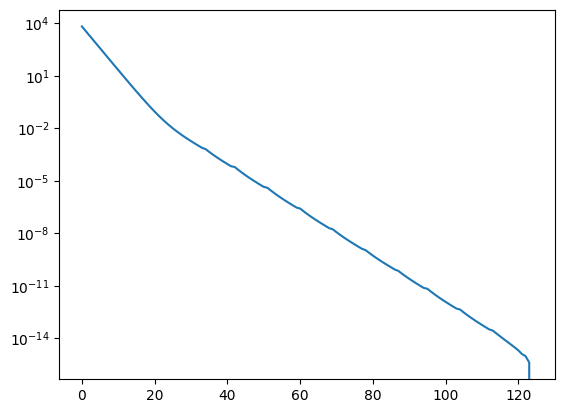

In [124]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(grad_val)),np.abs(obj_val-obj_val[-1]))
plt.yscale('log')

In [93]:
x0

array([-0.14285711,  0.78571426])

## Newton's Method

In [97]:
eps = 1e-7  # tolerance
x0 = np.array([10 , 20])
x1=np.array([0 , 0])
k=0
obj_value=[]
grad_value=[]

In [111]:

while np.linalg.norm(x1-x0)>eps and k<k_max:
    x1=x0-np.matmul(np.linalg.inv(hessian(x0)),gradient(x0))
    grad_value.append(np.linalg.norm(gradient(x0)))
    obj_value.append(objective(x1))
    k+=1

In [105]:
x1

array([-0.14285714,  0.78571429])

Despite varying the initial conditions, the newton's method converges in a single iteration due to its quadratic convergence rate and therefore does not generate a convergence plot. However the Gradient descent method takes multiple iterations as shown from the plot above. This is due to the linear convergence, and varies on the initial condition, and error tolerance, but does not depend on the value of t. The plot is not an exact straight line due to the fact that the line search method is inexact in nature. 